- Machine Learning Lab3
- Topic: Support Vector Machines
- Student Name: Jyosna Philip
- Roll No: 19
- Date: 14th March '24
- Submission : 20th March '24

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm,tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

C:\Users\jyosn\AppData\Local\Temp\ipykernel_15424\3362773470.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1) Run SVM2 for cancer.csv

In [2]:
# reading csv file and extracting class column to y.
x = pd.read_csv("cancer.csv")
a = np.array(x)
print(x.head())   
y = a[:,2] # classes having 0 and 1  #gets all rows of 3rd column

# extracting two features
x = np.column_stack((x.col1,x.col2))

# 569 samples and 2 features
print(x.shape)

print (x)
print(y)

     col1    col2  diagnosis  Unnamed: 3
0  122.80  1001.0          1         NaN
1  132.90  1326.0          1         NaN
2  130.00  1203.0          1         NaN
3   77.58   386.1          1         NaN
4  135.10  1297.0          1         NaN
(569, 2)
[[ 122.8  1001.  ]
 [ 132.9  1326.  ]
 [ 130.   1203.  ]
 ...
 [ 108.3   858.1 ]
 [ 140.1  1265.  ]
 [  47.92  181.  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1

In [3]:
#importing support vector classifier
from sklearn.svm import SVC

In [4]:
clf=SVC(kernel='linear') #choosing linear classifier
clf.fit(x,y)   #training

SVC(kernel='linear')

In [5]:
clf.predict([[120, 990]])

array([1.])

In [6]:
clf.predict([[85, 550]])

array([0.])

In [7]:
def make_meshgrid(x, y, h=0.2):#0.02
    x_min, x_max = x.min() - 1, x.max() + 1
    '''calculates the minimum and maximum values in the x array 
    and adds/subtracts 1 to create a slightly extended range. 
    This ensures the entire data is covered in the grid.'''
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    '''arrange:create an array of evenly spaced values starting 
    from x_min (inclusive) and ending at x_max (exclusive) with a step size of h'''
    ''' takes two one-dimensional arrays and generates a two-dimensional grid of coordinates. 
    the first argument is the array of x-coord, and second argument is the array of y-coord. 
    The output xx (containing the x-coord of the grid) and yy (containing the y-coord of the grid).'''
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params): #for plotting the contours
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
'''ax: a Matplotlib axis object where the plot will be created.
xx, yy: which are the two-dimensional grids of x and y coordinates 
**params: This argument uses the double asterisk notation, indicating it can accept a variable number
 of keyword arguments. These arguments will be used to customize the contour plot.
clf.predict(...): This method likely takes the combined (flattened) x and y coordinates from the grids (xx.ravel() and yy.ravel())
predicts a value for each data point based on the classifier's model.

Z.reshape(xx.shape): Since xx and yy represent the grid structure, this line reshapes the one-dimensional prediction 
output Z back into a two-dimensional array with the same shape as the original grids xx and yy. 
This ensures the predicted values are correctly mapped to the corresponding points in the grid.

ax.contourf(...): This line utilizes the contourf method of the Matplotlib axis object (ax).
xx, yy: These are the two-dimensional grids containing the x and y coordinates for plotting the contours.
Z: This is the two-dimensional array containing the predicted values at each grid point. 
This array determines the height or elevation for the contour plot.
**params: The variable keyword arguments (**params) passed to the function are used to customize the appearance of the contour plot. 
These might include options like the number of contour lines, colormap, line styles, etc. 
out: This likely represents a Matplotlib contour object containing information about the plotted contours.


The function returns the out variable, which holds the Matplotlib contour object representing the generated filled contour plot.
 This allows you to potentially interact with the plot object further (e.g., adding labels, adjusting colors).
'''


"ax: a Matplotlib axis object where the plot will be created.\nxx, yy: which are the two-dimensional grids of x and y coordinates \n**params: This argument uses the double asterisk notation, indicating it can accept a variable number\n of keyword arguments. These arguments will be used to customize the contour plot.\nclf.predict(...): This method likely takes the combined (flattened) x and y coordinates from the grids (xx.ravel() and yy.ravel())\npredicts a value for each data point based on the classifier's model.\n\nZ.reshape(xx.shape): Since xx and yy represent the grid structure, this line reshapes the one-dimensional prediction \noutput Z back into a two-dimensional array with the same shape as the original grids xx and yy. \nThis ensures the predicted values are correctly mapped to the corresponding points in the grid.\n\nax.contourf(...): This line utilizes the contourf method of the Matplotlib axis object (ax).\nxx, yy: These are the two-dimensional grids containing the x and y

2.Run Linear and Poly

SVC(kernel='linear')
[122.8  132.9  130.    77.58 135.1   82.57 119.6   90.2   87.5   83.97
 102.7  103.6  132.4  103.7   93.6   96.73  94.74 108.1  130.    87.46
  85.63  60.34 102.5  137.2  110.   116.    97.41 122.1  102.4  115.
 124.8   77.93 112.8  127.9  107.   110.1   93.63  82.61  95.54  88.4
  86.18  71.9  128.3   87.32  85.42 123.7   51.71  85.98  78.04  86.91
  74.72  87.21  75.71 120.3   97.26  73.34 125.5   95.55  82.61  54.34
  64.55  54.66  96.42  59.2   82.69  97.4   60.11  71.8   58.79  81.37
 123.6   58.79 114.2   90.43  79.19 104.1   87.91 120.2  143.7   83.19
  73.81  86.49 171.5  129.1   76.95 121.1   94.25 122.    79.78  95.77
  94.57 100.2   84.74  86.6  100.3  132.4   77.79  62.11  74.34  94.48
  88.05  43.79  77.22  63.95  67.41  87.21  75.17  79.01 152.8   72.48
  62.5   82.15  97.83  68.64  55.84  76.53  58.74  98.64 105.7  114.2
  73.34 121.4  166.2   94.28  86.1   88.44  87.76 123.4   99.58 130.4
  79.08 101.7  106.2  102.   120.2   81.72  74.72  73.06  96.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


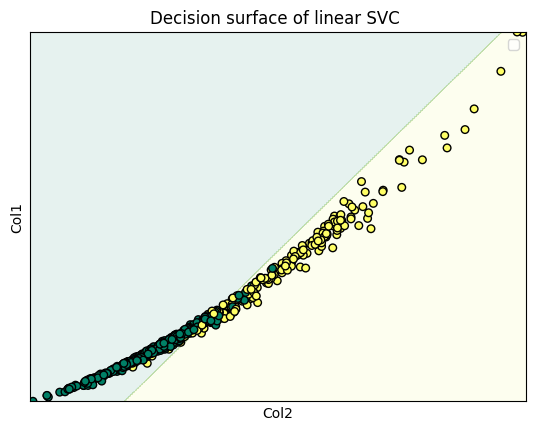

In [8]:
X=x
model = SVC(kernel='linear')
clf = model.fit(X, y)
print(clf)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
# print(X)
# print(y)
# print(X.iloc[:, 1])
X0, X1 = X[:, 0], X[:, 1]
print(X0,X1)

xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.summer, alpha=0.1)
ax.scatter(X0, X1, c=y, cmap=plt.cm.summer, s=30, edgecolors='k')
ax.set_ylabel('Col1')
ax.set_xlabel('Col2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

SVC(kernel='poly')
[122.8  132.9  130.    77.58 135.1   82.57 119.6   90.2   87.5   83.97
 102.7  103.6  132.4  103.7   93.6   96.73  94.74 108.1  130.    87.46
  85.63  60.34 102.5  137.2  110.   116.    97.41 122.1  102.4  115.
 124.8   77.93 112.8  127.9  107.   110.1   93.63  82.61  95.54  88.4
  86.18  71.9  128.3   87.32  85.42 123.7   51.71  85.98  78.04  86.91
  74.72  87.21  75.71 120.3   97.26  73.34 125.5   95.55  82.61  54.34
  64.55  54.66  96.42  59.2   82.69  97.4   60.11  71.8   58.79  81.37
 123.6   58.79 114.2   90.43  79.19 104.1   87.91 120.2  143.7   83.19
  73.81  86.49 171.5  129.1   76.95 121.1   94.25 122.    79.78  95.77
  94.57 100.2   84.74  86.6  100.3  132.4   77.79  62.11  74.34  94.48
  88.05  43.79  77.22  63.95  67.41  87.21  75.17  79.01 152.8   72.48
  62.5   82.15  97.83  68.64  55.84  76.53  58.74  98.64 105.7  114.2
  73.34 121.4  166.2   94.28  86.1   88.44  87.76 123.4   99.58 130.4
  79.08 101.7  106.2  102.   120.2   81.72  74.72  73.06  96.85

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


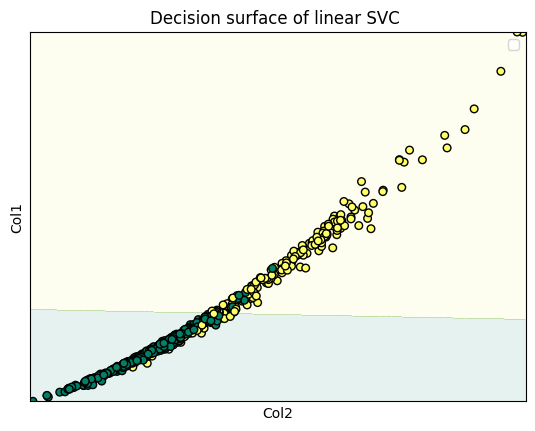

In [9]:
X=x
model = SVC(kernel='poly')
clf = model.fit(X, y)
print(clf)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
# print(X)
# print(y)
# print(X.iloc[:, 1])
X0, X1 = X[:, 0], X[:, 1]
print(X0,X1)

xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.summer, alpha=0.1)
ax.scatter(X0, X1, c=y, cmap=plt.cm.summer, s=30, edgecolors='k')
ax.set_ylabel('Col1')
ax.set_xlabel('Col2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

3)Check accuracy in terms of percentage
    if possible try train test split to get training accuracy and testing accuracy

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y) #for linear svm
clf=svm.SVC(kernel='linear').fit(x_train,y_train)
train_pred=clf.predict(x_train)
test_pred=clf.predict(x_test)

print("training accuracy score",accuracy_score(y_train, train_pred))
print("testing accuracy score: ",accuracy_score(y_test,test_pred))  #we probably get higher test accuracy because test data was easier than train data to predict

training accuracy score 0.892018779342723
testing accuracy score:  0.9020979020979021


5.Check SVM with Data we used in Decision Tree

In [23]:
df=pd.read_csv("dataTree1.csv")
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)
df1=df[:10,:]
df1.head()
a = np.array(df)  
y = a[:10,4]  #gets first 11 rows of 5th column
# extracting two features
x = np.column_stack((df.Age,df.Experience,df.Rank,df.Nationality))
#removed rows are:
#45,9,9,UK,YES   #24,3,5,USA,NO
X=x
Y=y
model=SVC(kernel='linear')
clf=model.fit(X,Y)
print(clf) 
y_pred=clf.predict(X)
print("accuracy score",accuracy_score(Y,y_pred))

InvalidIndexError: (slice(None, 10, None), slice(None, None, None))

I had removed two rows from the dataset. Checking accuracy for those rows.

In [21]:
X
x2=np.array((24,3,5,1))
x_test=np.column_stack((x1,x2))
y_test_pred=clf.predict(x_test)

ValueError: X has 2 features, but SVC is expecting 4 features as input.

In [14]:
print(clf.predict([[24,3,5,1]]))#output is 0 i.e. NO

[0]


In [ ]:
print(clf.predict([[45,9,9,0]]))

[1]


6) Run the Decision Tree for Cancer ALL data with 30 columns for X and Diagnosis column for y
Please remove ID column

[Text(0.625, 0.9375, 'radius.2 <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'cp.2 <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.234375, 0.6875, 'radius.1 <= 1.048\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'area.1 <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 's.1 <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'concavity.2 <= 0.195\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'texture.2 <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'texture.2 <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text

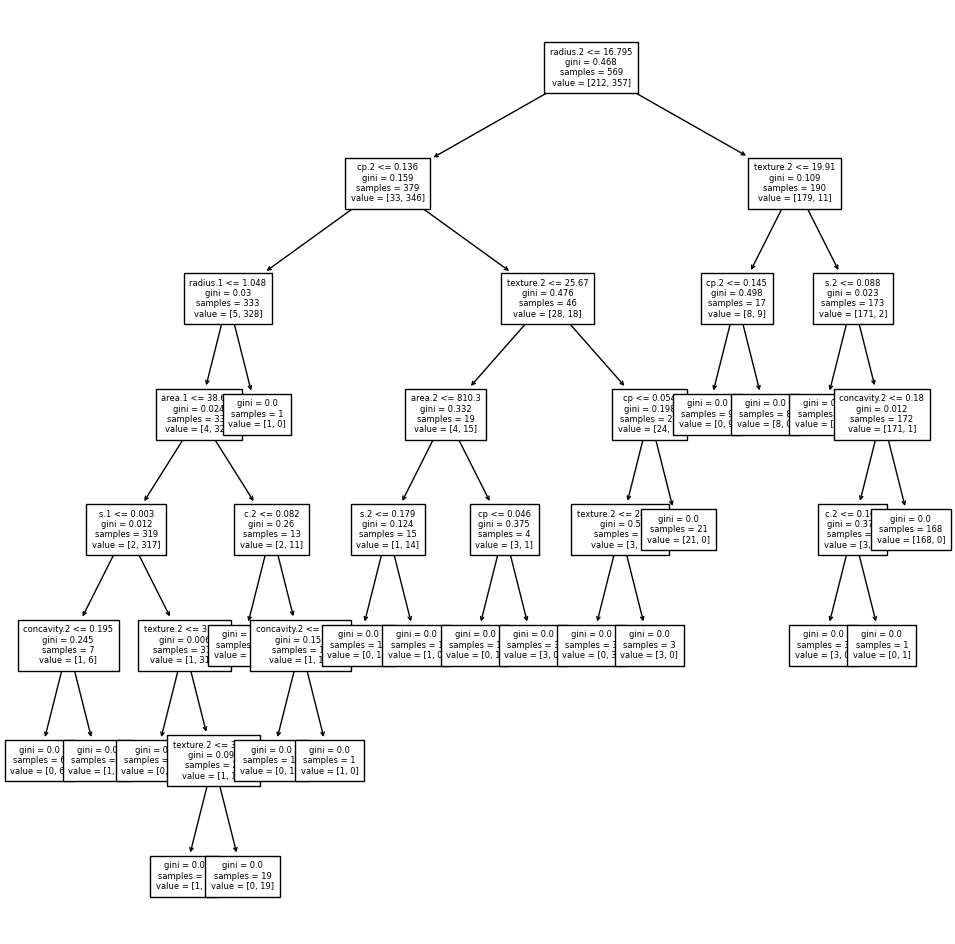

In [ ]:
df=pd.read_excel("cancerAll.xlsx")
map_df={"M":0,"B":1}
df["diagnosis"]=df["diagnosis"].map(map_df)
df.drop(columns=["ID"],inplace=True)
a=np.array(df)
y=a[:,0]
x=a[:,1:]
dtree=DecisionTreeClassifier()
dtree.fit(x,y)
features=list(df.columns)
features.remove("diagnosis")
plt.figure(figsize=(12,12))
tree.plot_tree(dtree,feature_names=features,fontsize=6)


7) Identify main columns in Step 6 from decision tree made and run for those columns on SVM

The main columns are radius.2, cp.2, texture,sym.1, texture.1,s.2, area.1,area.2, concavity,concavity.2,s.1,sym.1,cp,cp.1, sym, texture.2,

In [ ]:
# removing all unwanted columns
df.drop(columns=['perimeter', 'area', 's', 'c',  'fd', 'radius.1', 'perimeter.1',  'c.1', 'concavity.1','fd.1', 'perimeter.2', 'c.2', 'sym.2','fd.2'],inplace=True)
a=np.array(df)
y=a[:,0]
x=a[:,1:]
model=SVC(kernel='linear')
x_train,x_test,y_train,y_test=train_test_split(x,y) #for linear svm
model=SVC(kernel='linear').fit(x_train,y_train)
train_pred=clf.predict(x_train)
test_pred=clf.predict(x_test)
print("training accuracy score",accuracy_score(y_train, train_pred))
print("testing accuracy score: ",accuracy_score(y_test,test_pred))  #we probably get higher test accuracy because test data was easier than train data to predict




training accuracy score 0.9671361502347418
testing accuracy score:  0.9370629370629371
